# Instructions
The following Cells need to be executed.

They are used to download and generate a dataset that has an aggregated count of bike trips per hundredth of an hour through the 24 hours in a day. 

I put all this here instead of providing you the dataset directly, so that you could learn something along the way :) 

The assignment is in the last cell.

In [25]:
!pip3 install seaborn

    100% |████████████████████████████████| 163kB 1.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /Users/mahmoud/Library/Caches/pip/wheels/cb/c8/67/83d615c0ef9b529558525aa521025b183de8c5b156799b091e
Successfully built seaborn


## This cell automatically downloads Capital Bikeshare data

In [9]:
import sys
sys.path.append('..')
from utils.bikeshare import download_bikeshare_data

download_bikeshare_data(2016, 1, '../data/')

Downloading: 2016 Q1 | Extracting... | Created: ../data/2016-Q1-cabi-trip-history-data.csv


### And here we read in the data

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
bikes = pd.read_csv('../data/2016Q1-capitalbikeshare-tripdata.csv')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)

bikes.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,start,end
0,166,2016-01-01 00:06:58,2016-01-01 00:09:44,31102,11th & Kenyon St NW,31105,14th & Harvard St NW,W01346,Member,2016-01-01 00:06:58,2016-01-01 00:09:44
1,448,2016-01-01 00:10:20,2016-01-01 00:17:48,32039,Old Georgetown Rd & Southwick St,32002,Bethesda Ave & Arlington Rd,W22202,Member,2016-01-01 00:10:20,2016-01-01 00:17:48
2,715,2016-01-01 00:13:52,2016-01-01 00:25:48,31222,New York Ave & 15th St NW,31214,17th & Corcoran St NW,W21427,Member,2016-01-01 00:13:52,2016-01-01 00:25:48
3,213,2016-01-01 00:15:29,2016-01-01 00:19:03,31506,1st & Rhode Island Ave NW,31509,New Jersey Ave & R St NW,W01294,Member,2016-01-01 00:15:29,2016-01-01 00:19:03
4,872,2016-01-01 00:16:16,2016-01-01 00:30:49,31041,Prince St & Union St,31048,King St Metro South,W22058,Member,2016-01-01 00:16:16,2016-01-01 00:30:49


### Create a new column that represents the hour of the day 

In [5]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60).round(2))

### Aggregate to get a count per hour/minute of the day across all trips

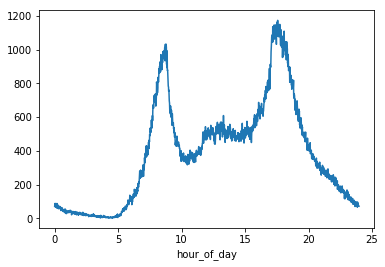

In [6]:
hours = bikes.groupby('hour_of_day').agg('count')
hours['hour'] = hours.index

hours.start.plot()
# import seaborn as sns

# sns.lmplot(x='hour', y='start', data=hours, aspect=1.5, scatter_kws={'alpha':0.2})

# Assignment 4
Using the **`hours`** dataframe and the `hour_of_day` column, perform the following cells. 

Explain the results in a **paragraph + charts** of  to describe which model you'd recommend


## 1. Create 3 models fit to `hour_of_day` with varying polynomial degrees 

In [7]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

In [15]:
hours
hours.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,start,end,hour
hour_of_day,,,,,,,,,,,,
0.00,71,71,71,71,71,71,71,71,71,71,71,0.00
0.02,88,88,88,88,88,88,88,88,88,88,88,0.02
0.03,74,74,74,74,74,74,74,74,74,74,74,0.03
0.05,77,77,77,77,77,77,77,77,77,77,77,0.05
0.07,66,66,66,66,66,66,66,66,66,66,66,0.07


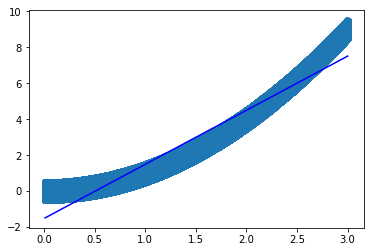

In [19]:
n = 552400
x = np.linspace(0.01, 3, n).reshape(-1, 1)
y = np.linspace(0.01, 3, n) * np.linspace(0.01, 3, n) + np.random.rand(n) - .5


plt.scatter(x,y)
plt.plot(x, x*linear.coef_ + linear.intercept_, c='b')

In [17]:
linear = linear_model.LinearRegression()

linear.fit(x, y)

linear.coef_, linear.intercept_

(array([3.00979324]), -1.5202046888365257)

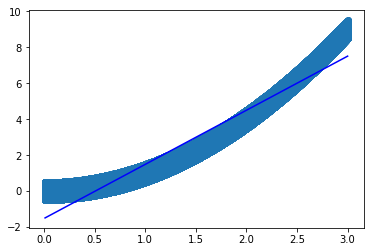

In [18]:
plt.scatter(x,y)
plt.plot(x, x*linear.coef_ + linear.intercept_, c='b')

In [21]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=15)

x_15= poly.fit_transform(x.reshape(-1, 1))

In [22]:
linear = linear_model.LinearRegression()

linear.fit(x_15, y)

(linear.coef_, linear.intercept_)

(array([ 0.00000000e+00,  6.65557172e-01, -9.74062628e+00,  7.81070563e+01,
        -3.18460897e+02,  8.23299881e+02, -1.45031105e+03,  1.81566889e+03,
        -1.65301894e+03,  1.10494527e+03, -5.41441591e+02,  1.91966499e+02,
        -4.78655265e+01,  7.95204148e+00, -7.89550837e-01,  3.54187776e-02]),
 -0.01200074100206594)

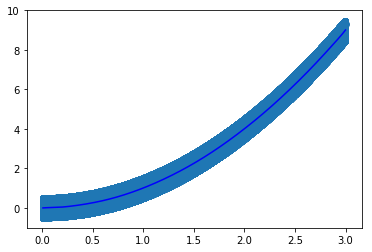

In [23]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

x_2= poly.fit_transform(x.reshape(-1, 1))

In [25]:
linear = linear_model.LinearRegression()

linear.fit(x_2, y)

(linear.coef_, linear.intercept_)

(array([ 0.00000000e+00, -2.80547562e-04,  1.00001556e+00]),
 0.0002031101826003301)

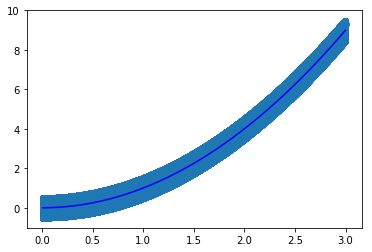

In [26]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_2, linear.coef_) + linear.intercept_, c='b')

## 2. Choose one of the polynomial models and create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values


In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)

x_2= poly.fit_transform(x.reshape(-1, 1))

In [29]:
linear = linear_model.LinearRegression()

linear.fit(x_2, y)

(linear.coef_, linear.intercept_)

(array([ 0.00000000e+00, -2.80547562e-04,  1.00001556e+00]),
 0.0002031101826003301)

In [30]:
ridge = linear_model.Ridge()

ridge.fit(x_2, y)

(ridge.coef_, ridge.intercept_)

(array([ 0.00000000e+00, -2.68265367e-04,  1.00001148e+00]),
 0.00019690716894382732)

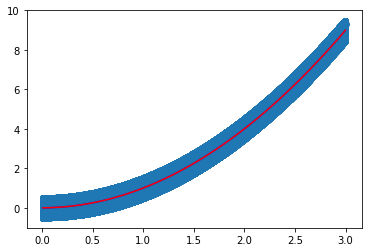

In [31]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_2, linear.coef_) + linear.intercept_, c='b')
plt.plot(x, np.dot(x_2, ridge.coef_) + ridge.intercept_, c='r')

In [33]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10)

x_10= poly.fit_transform(x.reshape(-1, 1))

In [34]:
linear = linear_model.LinearRegression()

linear.fit(x_10, y)

(linear.coef_, linear.intercept_)

(array([ 0.00000000e+00, -2.69350137e-01,  3.23020591e+00, -7.93397599e+00,
         1.50586040e+01, -1.69134968e+01,  1.17999450e+01, -5.16990652e+00,
         1.38409188e+00, -2.06961823e-01,  1.32467576e-02]),
 0.00821148524487425)

In [35]:
ridge = linear_model.Ridge()

ridge.fit(x_10, y)

(ridge.coef_, ridge.intercept_)

(array([ 0.00000000e+00,  5.75627166e-02,  8.15267892e-01,  2.14350609e-01,
        -5.16450114e-02, -6.66603686e-02,  2.71026942e-02,  2.37241422e-02,
        -2.01040579e-02,  5.41370221e-03, -5.11622599e-04]),
 -0.00444042052149074)

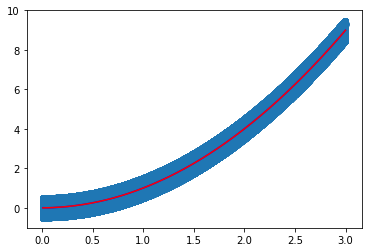

In [36]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_10, linear.coef_) + linear.intercept_, c='b')
plt.plot(x, np.dot(x_10, ridge.coef_) + ridge.intercept_, c='r')

In [41]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=50)

x_50= poly.fit_transform(x.reshape(-1, 1))

In [43]:
linear = linear_model.LinearRegression()

linear.fit(x_50, y)

(linear.coef_, linear.intercept_)

(array([-7.84092274e-15, -6.28289279e-09,  3.25145576e-10, -1.57611314e-11,
        -1.00807983e-10,  4.96783680e-11, -5.49029186e-11,  2.50288708e-11,
        -1.35409544e-11, -8.94452050e-11, -3.41023130e-10, -2.63362808e-10,
         2.49462510e-13,  4.93069187e-13,  9.62038249e-13,  1.85377499e-12,
         3.52796551e-12,  6.62948500e-12,  1.22939988e-11,  2.24816467e-11,
         4.04989290e-11,  7.17774222e-11,  1.24964481e-10,  2.13315392e-10,
         3.56208461e-10,  5.80264770e-10,  9.18973083e-10,  1.40888850e-09,
         2.07957683e-09,  2.93412479e-09,  3.91854130e-09,  4.88384816e-09,
         5.55633790e-09,  5.54926479e-09,  4.46543565e-09,  2.13238582e-09,
        -1.05868097e-09, -3.90481767e-09, -4.64164904e-09, -2.10766202e-09,
         2.43784701e-09,  4.71228663e-09,  1.01570546e-09, -4.68704963e-09,
        -1.71789488e-09,  5.96949340e-09, -4.25118396e-09,  1.54375889e-09,
        -3.18034208e-10,  3.55562964e-11, -1.68615021e-12]),
 1.3545903246543278)

In [44]:
ridge = linear_model.Ridge()

ridge.fit(x_50, y)

(ridge.coef_, ridge.intercept_)

(array([-4.54651451e-10, -5.45183013e-08,  1.45916922e-08,  3.79095648e-08,
        -1.03128319e-08,  4.94298116e-09, -6.07296967e-10, -1.24841405e-09,
         1.72398705e-09, -4.95932816e-10,  4.62597221e-08, -4.86216542e-08,
         2.95555274e-09, -3.39590468e-09, -5.39262619e-09,  9.22836668e-10,
         5.96188294e-09,  9.43570327e-11,  1.57776112e-10,  2.84270233e-10,
         4.27793062e-10,  4.93504949e-10,  8.14715766e-10,  1.16570418e-09,
         1.57830235e-09,  2.14680423e-09,  2.94137260e-09,  3.61328913e-09,
         4.28970383e-09,  4.76800546e-09,  4.55545859e-09,  3.77685886e-09,
         2.31607521e-09, -2.75192354e-12, -2.26865886e-09, -3.63123481e-09,
        -3.05716080e-09, -4.37109221e-10,  2.76484288e-09,  3.50522401e-09,
         2.77570365e-10, -3.32272907e-09, -2.30737298e-09,  3.82373934e-09,
         5.26011859e-10, -2.92605503e-09,  2.04301439e-09, -7.22374677e-10,
         1.45758086e-10, -1.60650606e-11,  7.55336314e-13]), 2.583655266060578)

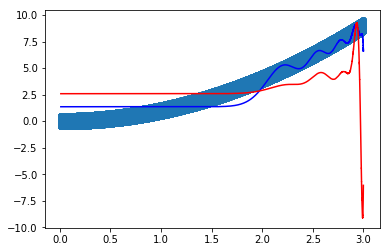

In [45]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_50, linear.coef_) + linear.intercept_, c='b')
plt.plot(x, np.dot(x_50, ridge.coef_) + ridge.intercept_, c='r')